In [1]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

### Load Dataset

In [2]:
movies = pd.read_csv("ml-100k/u.item",sep="|",header = None , encoding = "latin-1")
movies = movies[[0,1]]
movies.columns = ["movieId","title"]
print(movies.head())

   movieId              title
0        1   Toy Story (1995)
1        2   GoldenEye (1995)
2        3  Four Rooms (1995)
3        4  Get Shorty (1995)
4        5     Copycat (1995)


In [3]:
ratings = pd.read_csv("ml-100k/u.data",sep="\t",header=None)
ratings = ratings[[0,1,2]]
ratings.columns = ["userId","movieId","rating"]
print(ratings.head())

   userId  movieId  rating
0     196      242       3
1     186      302       3
2      22      377       1
3     244       51       2
4     166      346       1


### Create user movie matrix

In [5]:
user_movies_matrix = ratings.pivot(
    index="userId",
    columns="movieId",
    values="rating"
).fillna(0)

### Normalize user ratings

In [6]:
scaler = StandardScaler()
user_movies_scaled = scaler.fit_transform(user_movies_matrix)

### Dimensionality Reduction using PCA

In [7]:
pca = PCA(n_components=2,random_state=42)
user_movies_pca = pca.fit_transform(user_movies_scaled)

### K-Means Clustering

In [8]:
kmeans = KMeans(n_clusters=2,random_state=42)
user_cluster = kmeans.fit_predict(user_movies_scaled)

C:\Users\ashut\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


### Create Dataframe with results

In [11]:
user_cluster_df = pd.DataFrame(user_movies_pca,columns=["PC!","PC2"])
user_cluster_df["cluster"] = user_cluster
user_cluster_df["userId"] = user_movies_matrix.index

### Save Model

In [13]:
pickle.dump(scaler , open("scaler.pkl","wb"))
pickle.dump(kmeans , open("kmeans.pkl","wb"))
pickle.dump(user_movies_matrix , open("user_movie_matrix.pkl" , "wb"))
pickle.dump(movies , open("movies.pkl","wb"))

### Plot Clusters

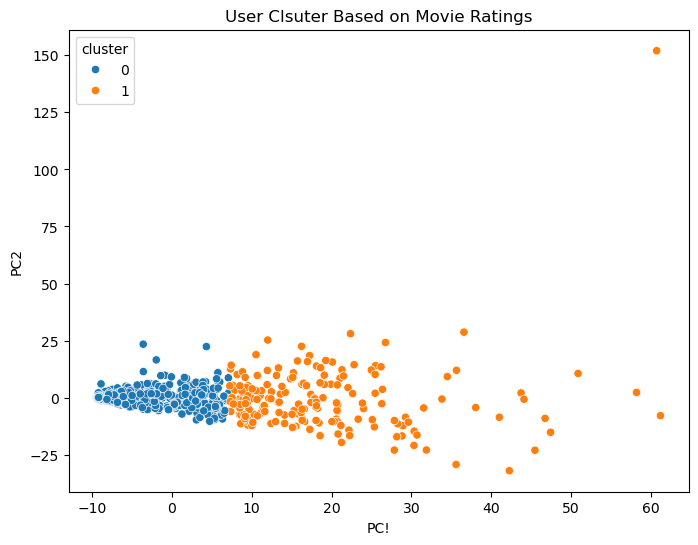

In [14]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=user_cluster_df,x="PC!",y="PC2",hue="cluster",palette="tab10")
plt.title("User Clsuter Based on Movie Ratings")
plt.savefig("Cluster.png")
plt.show()